In [43]:
# 라이브러리

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

In [44]:
# 데이터 로드

train_ratings = pd.read_csv("train/train_ratings.csv")

titles = pd.read_csv("train/titles.tsv", sep="\t")
years = pd.read_csv("train/years.tsv", sep="\t")
genres = pd.read_csv("train/genres.tsv", sep="\t")
directors = pd.read_csv("train/directors.tsv", sep="\t")
writers = pd.read_csv("train/writers.tsv", sep="\t")

print(train_ratings.shape)
train_ratings.head()

(5154471, 3)


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [45]:
# train-ratings 기본 통계
n_users = train_ratings["user"].nunique()
n_items = train_ratings["item"].nunique()

print("유저 수:", n_users)
print("아이템 수:", n_items)
print("총 interaction 수:", len(train_ratings))
print("유저당 평균 interaction 수:", len(train_ratings) / n_users)
print("아이템당 평균 interaction 수:", len(train_ratings) / n_items)

유저 수: 31360
아이템 수: 6807
총 interaction 수: 5154471
유저당 평균 interaction 수: 164.36450892857144
아이템당 평균 interaction 수: 757.2309387395328


In [17]:
# 유저별 interaction 분포
user_interactions = train_ratings.groupby("user").size()

user_interactions.describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
dtype: float64

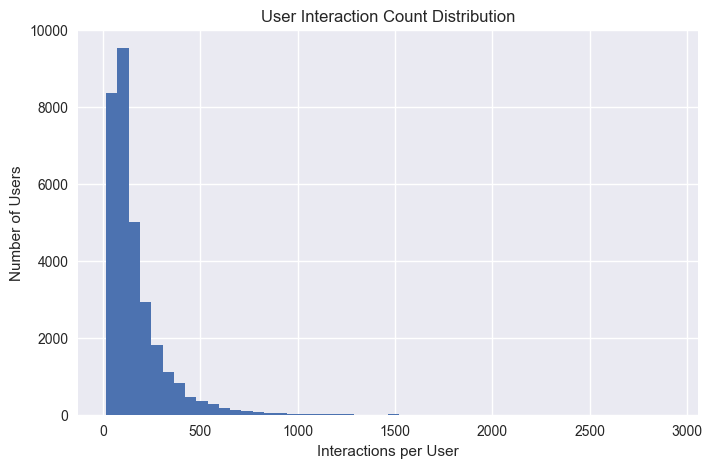

In [18]:
plt.hist(user_interactions, bins=50)
plt.title("User Interaction Count Distribution")
plt.xlabel("Interactions per User")
plt.ylabel("Number of Users")
plt.show()

In [19]:
# 아이템별 interaction 분포
item_interactions = train_ratings.groupby("item").size()

item_interactions.describe()

count     6807.000000
mean       757.230939
std       1682.973090
min         27.000000
25%         90.000000
50%        197.000000
75%        610.500000
max      19699.000000
dtype: float64

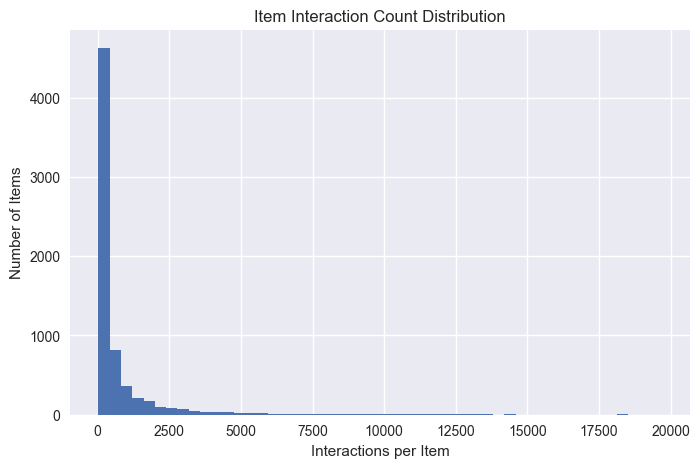

In [20]:
plt.hist(item_interactions, bins=50)
plt.title("Item Interaction Count Distribution")
plt.xlabel("Interactions per Item")
plt.ylabel("Number of Items")
plt.show()

In [47]:
# years 분포
years["year"].describe()

count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

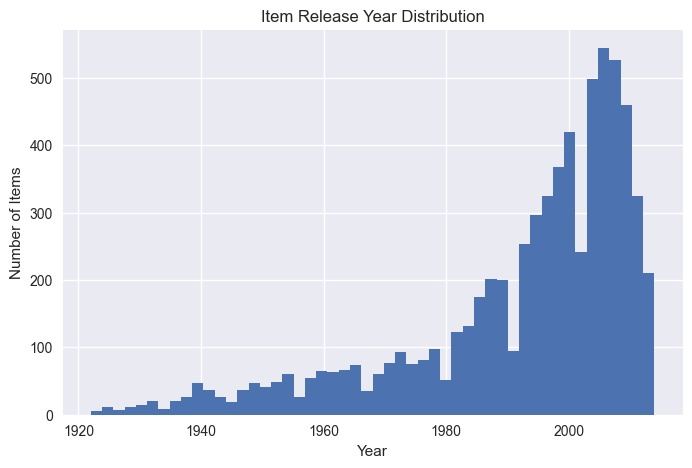

In [22]:
plt.hist(years["year"], bins=50)
plt.title("Item Release Year Distribution")
plt.xlabel("Year")
plt.ylabel("Number of Items")
plt.show()

In [48]:
# 장르 분포 

genre_counts = genres["genre"].value_counts()

genre_counts.head(10)

genre
Drama        3490
Comedy       2408
Thriller     1466
Romance      1251
Action       1246
Crime         924
Adventure     891
Sci-Fi        653
Horror        602
Fantasy       557
Name: count, dtype: int64

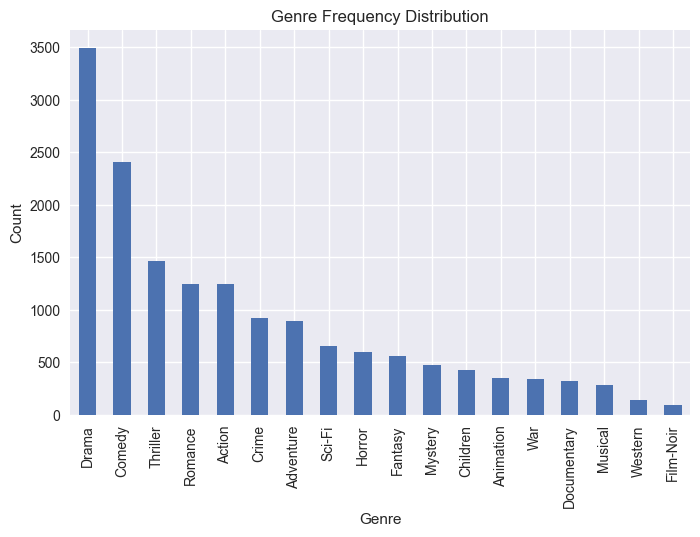

In [24]:
genre_counts.plot(kind="bar")
plt.title("Genre Frequency Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [49]:
# top 10 아이템

top_items = item_interactions.sort_values(ascending=False).head(10)
top_items

item
2571    19699
2959    18437
296     18202
318     18168
356     17339
4993    17237
7153    16656
5952    16387
593     15847
2858    15213
dtype: int64

In [26]:
top_items_df = top_items.reset_index()
top_items_df.columns = ["item", "interaction_count"]

top_items_df.merge(titles, on="item", how="left")

,item,interaction_count,title
0,2571,19699,"Matrix, The (1999)"
1,2959,18437,Fight Club (1999)
2,296,18202,Pulp Fiction (1994)
3,318,18168,"Shawshank Redemption, The (1994)"
4,356,17339,Forrest Gump (1994)
5,4993,17237,"Lord of the Rings: The Fellowship of the Ring,..."
6,7153,16656,"Lord of the Rings: The Return of the King, The..."
7,5952,16387,"Lord of the Rings: The Two Towers, The (2002)"
8,593,15847,"Silence of the Lambs, The (1991)"
9,2858,15213,American Beauty (1999)


In [52]:
# interaction 100 이하 아이템 비율

tail_items = (item_interactions <= 100).sum()
total_items = len(item_interactions)

print("Long-tail 아이템 비율:", tail_items / total_items)

Long-tail 아이템 비율: 0.29161157631849566


In [53]:
# interaction 500 이하 아이템 비율
(item_interactions <= 500).sum() / total_items

np.float64(0.712061113559571)

In [33]:
directors.head()

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [ ]:
# train-ratings 결측치 확인
train_ratings.isnull().sum()

user    0
item    0
time    0
dtype: int64

In [ ]:
# train-ratings 이상치 확인
train_ratings["time"].describe()

count    5.154471e+06
mean     1.248017e+09
std      8.968302e+07
min      1.113221e+09
25%      1.170355e+09
50%      1.234651e+09
75%      1.318284e+09
max      1.427781e+09
Name: time, dtype: float64

In [ ]:
# years 결측치
years.isnull().sum()

item    0
year    0
dtype: int64

In [41]:
# years 이상치
years["year"].describe()

count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

In [42]:
# 장르 결측치
genres.isnull().sum()

item     0
genre    0
dtype: int64